In [2]:
!pip install tensorflow tensorflow-cpu opencv-python matplotlib
!pip list
import tensorflow as tf
import os


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Package                      Version
---------------------------- --------
absl-py                      1.4.0
asttokens                    2.2.1
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.0
certifi                      2023.5.7
charset-normalizer           3.1.0
cmake                        3.26.3
colorama                     0.4.6
comm                         0.1.3
contourpy                    1.0.7
cycler                       0.11.0
debugpy                      1.6.7
decorator                    5.1.1
executing                    1.2.0
flatbuffers                  23.5.9
fonttools                    4.39.4
gast                         0.4.0
google-auth                  2.18.0
google-auth-oauthlib         1.0.0
google-pasta                 0.2.0
grpcio                       1.54.2
h5py                         3.8.0
idna                         3.4
ipykernel                    6.23.1
ipython                      8.13.2
jax   


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [150]:
#remove bad images
import cv2
import imghdr
data_dir = 'Data1'
image_exts = ['jpeg','jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0
Issue with image Data1\0


Found 54000 files belonging to 36 classes.


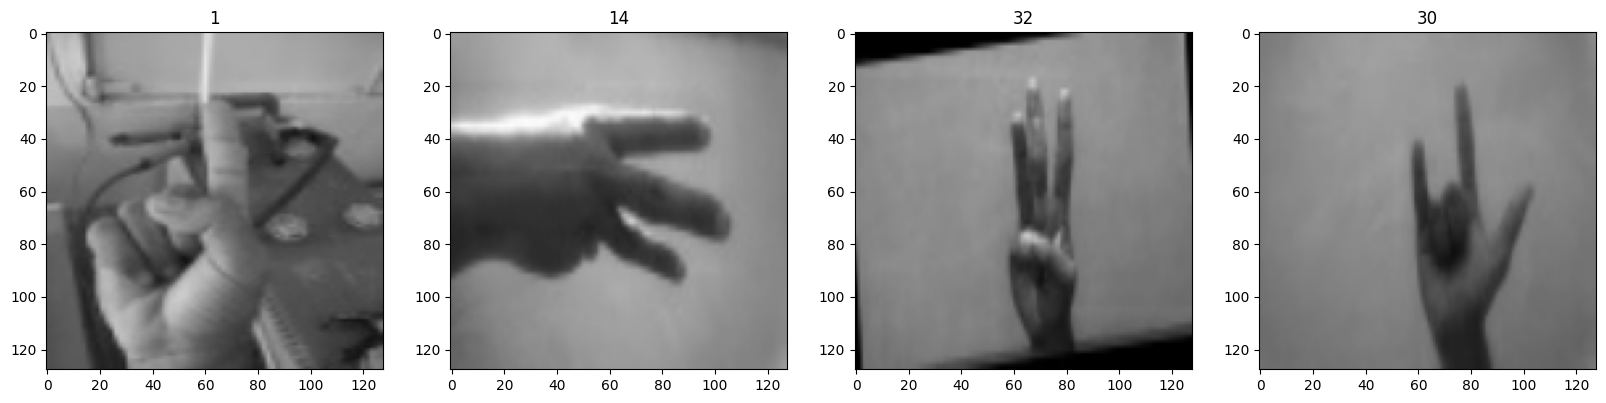

In [151]:
#load data
import numpy as np
from matplotlib import pyplot as plt
data = tf.keras.utils.image_dataset_from_directory('Data1', batch_size=64, image_size = (128,128))
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [152]:
# Scale Data
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [1.5104167e-01, 1.5104167e-01, 1.5104167e-01],
          ...,
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
 
         [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [1.5172191e-01, 1.5172191e-01, 1.5172191e-01],
          ...,
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [2.4629480e-04, 2.4629480e-04, 2.4629480e-04],
          [7.5061276e-04, 7.5061276e-04, 7.5061276e-04]],
 
         [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [1.5336004e-01, 1.5336004e-01, 1.5336004e-01],
          ...,
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [8.3941291e-04, 8.3941291e-

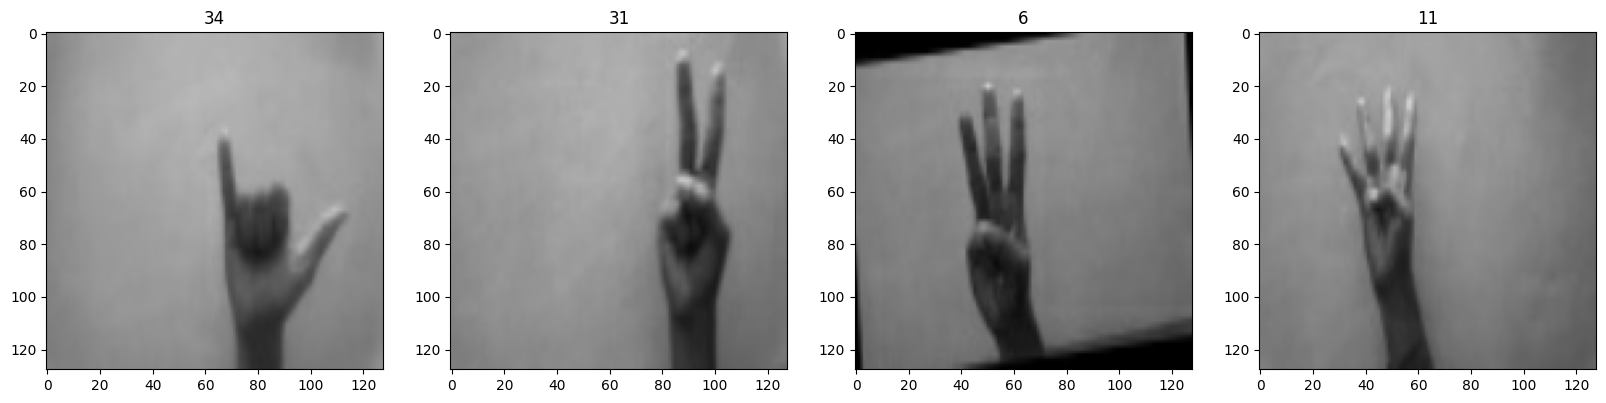

In [153]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [154]:
# Split Data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)


train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [155]:
#build model
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [156]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, MaxPool2D

In [78]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [79]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [165]:
model = Sequential([Conv2D(filters=32,  kernel_size=(3,3), activation="relu", input_shape=(128,128,3)),
                    MaxPool2D(2,2, padding='same'),
                    
                    Conv2D(filters=128,  kernel_size=(3,3), activation="relu"),
                    MaxPool2D(2,2, padding='same'),
                    
                    Conv2D(filters=512, kernel_size=(3,3), activation="relu"),
                    MaxPool2D(2,2, padding='same'),
                    
                    Flatten(),
                    
                    Dense(units=1024, activation="relu"),                 
                    Dense(units=256, activation="relu"),
                    Dropout(0.5),
                    Dense(units=40, activation="softmax")
])

In [166]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [167]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 61, 61, 128)       36992     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 31, 31, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 29, 29, 512)       590336    
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 15, 15, 512)    

In [161]:
model.fit??

Signature:
model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose='auto',
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)
Source:   
    @traceback_utils.filter_traceback
    def fit(
        self,
        x=None,
        y=None,
        batch_size=None,
        epochs=1,
        verbose="auto",
        callbacks=None,
        validation_split=0.0,
        validation_data=None,
        shuffle=True,
        class_weight=None,
        sample_weight=None,
        initial_epoch=0,
        steps_per_epoch=None,
        validation_steps=None,
        validation_batch_size=None,
        validation_freq=1,
        max_queue_size=10,
        workers=1,
        use_multiprocessing=Fal

In [169]:
#trian
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
590/590 [==============================] - 1713s 3s/step - loss: 0.4940 - accuracy: 0.7420 - val_loss: 0.4258 - val_accuracy: 0.7392
Epoch 2/10
590/590 [==============================] - 1711s 3s/step - loss: 0.3881 - accuracy: 0.7619 - val_loss: 0.4252 - val_accuracy: 0.7432
Epoch 3/10
590/590 [==============================] - 1701s 3s/step - loss: 0.3572 - accuracy: 0.7667 - val_loss: 0.3995 - val_accuracy: 0.7489
Epoch 4/10
590/590 [==============================] - 1700s 3s/step - loss: 0.3452 - accuracy: 0.7704 - val_loss: 0.4042 - val_accuracy: 0.7453
Epoch 5/10
590/590 [==============================] - 1713s 3s/step - loss: 0.3441 - accuracy: 0.7735 - val_loss: 0.4208 - val_accuracy: 0.7412
Epoch 6/10
590/590 [==============================] - 1800s 3s/step - loss: 0.3362 - accuracy: 0.7778 - val_loss: 0.4089 - val_accuracy: 0.7427
Epoch 7/10
590/590 [==============================] - 1887s 3s/step - loss: 0.3286 - accuracy: 0.7783 - val_loss: 0.4002 - val_accuracy:

In [173]:
import pandas as pd

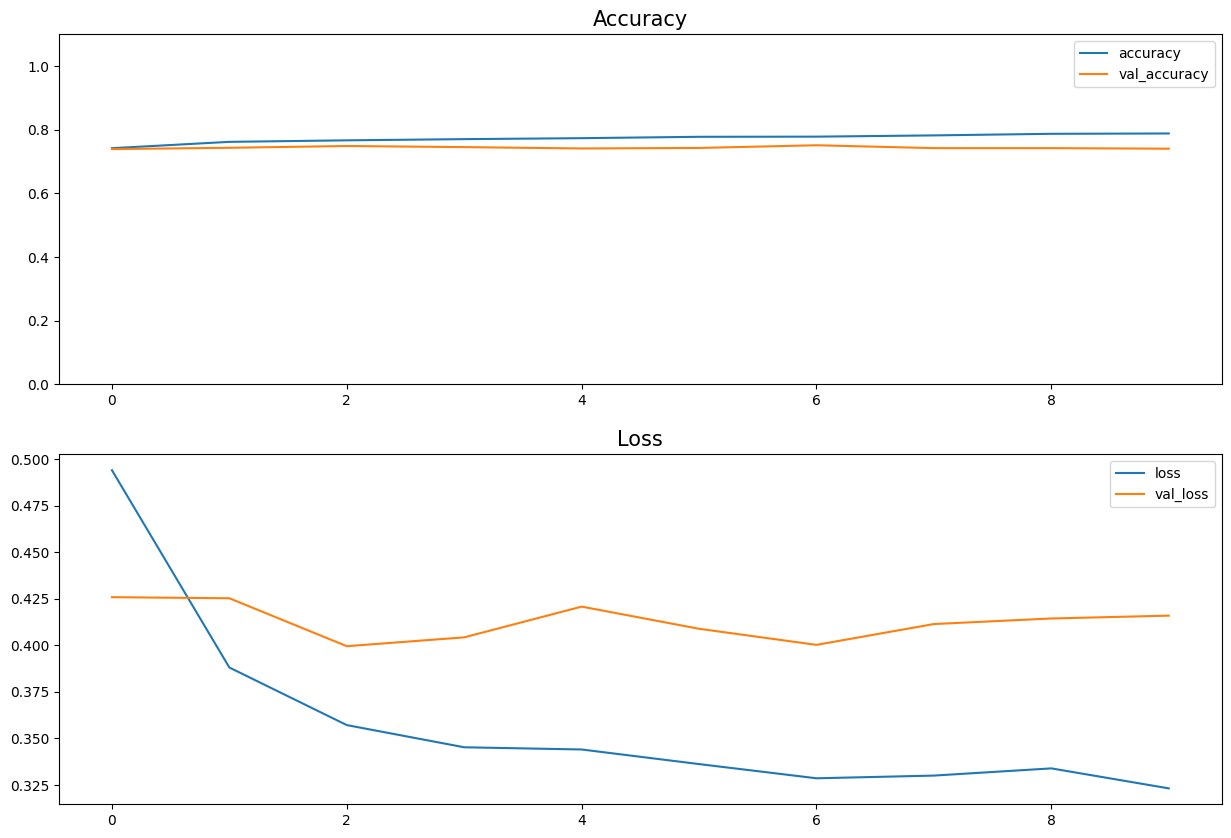

In [174]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
ax = axes.flat

pd.DataFrame(hist.history)[['accuracy','val_accuracy']].plot(ax=ax[0])
ax[0].set_title("Accuracy", fontsize = 15)
ax[0].set_ylim(0,1.1)

pd.DataFrame(hist.history)[['loss','val_loss']].plot(ax=ax[1])
ax[1].set_title("Loss", fontsize = 15)
plt.show()

In [ ]:
# Test
import cv2

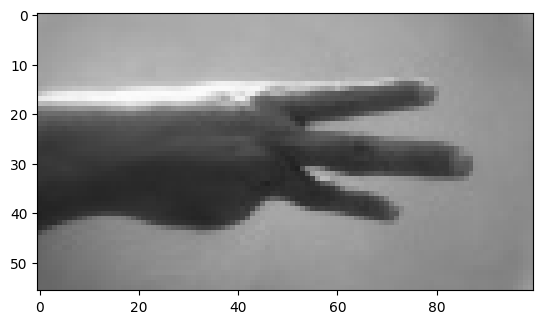

In [195]:
img = cv2.imread('e_47.jpg')
plt.imshow(img)
plt.show()

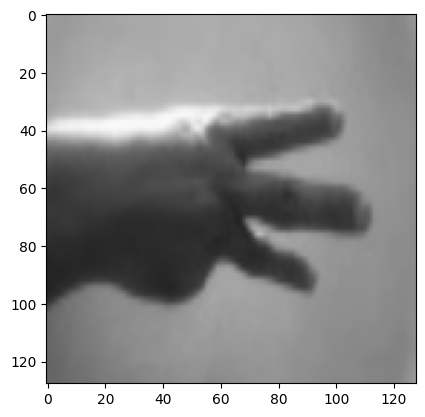

In [196]:
resize = tf.image.resize(img, (128,128))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [139]:
model.evaluate??

Signature:
model.evaluate(
    x=None,
    y=None,
    batch_size=None,
    verbose='auto',
    sample_weight=None,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    return_dict=False,
    **kwargs,
)
Source:   
    @traceback_utils.filter_traceback
    def evaluate(
        self,
        x=None,
        y=None,
        batch_size=None,
        verbose="auto",
        sample_weight=None,
        steps=None,
        callbacks=None,
        max_queue_size=10,
        workers=1,
        use_multiprocessing=False,
        return_dict=False,
        **kwargs,
    ):
        """Returns the loss value & metrics values for the model in test mode.

        Computation is done in batches (see the `batch_size` arg.)

        Args:
            x: Input data. It could be:
              - A Numpy array (or array-like), or a list of arrays
                (in case the model has multiple inputs).
              - A TensorFlow tensor, or a list 

In [197]:
yhat = model.predict(np.expand_dims(resize/128, 0))
yhat

1/1 [==============================] - 0s 68ms/step


array([[7.2688645e-31, 9.1537104e-33, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 2.2263607e-32, 1.0000000e+00, 1.4182756e-37,
        2.3977141e-22, 1.6010690e-32, 1.2900013e-36, 6.3207955e-38,
        0.0000000e+00, 0.0000000e+00, 3.5435230e-30, 7.9560821e-37,
        1.3720469e-29, 6.3631799e-31, 9.1478651e-29, 0.0000000e+00,
        1.3821228e-36, 0.0000000e+00, 0.0000000e+00, 2.3916471e-38,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 5.4000361e-29,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
      dtype=float32)

In [198]:
yhat[0].max()

1.0

In [140]:
yhat??

Type:        ndarray
String form:
[[8.9732995e-12 1.0000000e+00 9.8805061e-11 2.1825211e-09 6.7661541e-17
  1.3423112e-20 6.1301249e-19 6.3171685e-19 6.0116921e-20 2.8386393e-20
  1.1911350e-17 5.7556504e-17 6.5774921e-19 1.6729408e-16 3.9830810e-18
  1.9647254e-18 4.7186694e-19 4.7306238e-17 3.1576852e-19 5.3829781e-17
  3.4742490e-19 1.4449053e-19 2.3656918e-19 4.0639958e-18 1.2705367e-18]]
Length:      1
File:        c:\study\biai\aslrecognition\lib\site-packages\numpy\__init__.py
Docstring:  
ndarray(shape, dtype=float, buffer=None, offset=0,
        strides=None, order=None)

An array object represents a multidimensional, homogeneous array
of fixed-size items.  An associated data-type object describes the
format of each element in the array (its byte-order, how many bytes it
occupies in memory, whether it is an integer, a floating point number,
or something else, etc.)

Arrays should be constructed using `array`, `zeros` or `empty` (refer
to the See Also section below).  The param

In [199]:
print(yhat.argmax())

14


(array([0], dtype=int64), array([1], dtype=int64))

In [180]:
#Save
model.save(os.path.join('models','aslmodelASL.h5'))